# This notebook was created from the [official exercise](https://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#sphx-glr-auto-examples-exercises-plot-cv-diabetes-py) provided by sklearn module. Basically, we have more detailed notes here in current revised notebook for better understanding the workflow.

## Yuanpeng Zhang @ Sun 2-Feb-20
## NIST & ORNL

In [1]:
%matplotlib inline

# Disable future warning.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Cross-validation on diabetes Dataset Exercise
The dataset comes together with the sklearn module.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# The X variable of the diabetes data is 10-dimensional, 
# i. e. we have 10 properties for one person. The y variable is 
# our dependent variable, which, maybe, characterizes the risk
# of being diagnosed as with diabetes. Here we select 150 datasets,
# i.e. data for 150 persons.
X, y = datasets.load_diabetes(return_X_y=True)
X = X[:150]
y = y[:150]

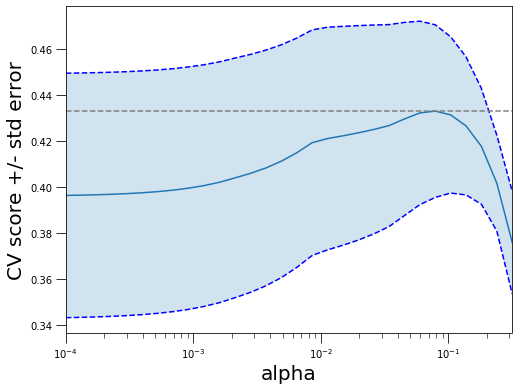

In [3]:
lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

# Choose 'lasso' (defined above) as our estimator here.
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False);
clf.fit(X, y);

# The score function used by Lasso (in sklearn module) is R2.
# Refer to the following links for more information:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
# https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score
# The convention of score is -- the high, the better.
scores = clf.cv_results_['mean_test_score'];
scores_std = clf.cv_results_['std_test_score'];
plt.figure().set_size_inches(8, 6);
plt.semilogx(alphas, scores);

# Plot error lines showing +/- std. errors of the scores.
std_error = scores_std / np.sqrt(n_folds);

plt.semilogx(alphas, scores + std_error, 'b--');
plt.semilogx(alphas, scores - std_error, 'b--');

# alpha=0.2 controls the translucency of the fill color. 'alpha' here
# is nothing to do with the hyperparameter 'alpha' above.
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2);

plt.ylabel('CV score +/- std error', fontsize=20);
plt.xlabel('alpha', fontsize=20);
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.tick_params(axis='both', length=10, which='major')
plt.tick_params(axis='both', length=5, which='minor')
# Indicator of the best score.
plt.axhline(np.max(scores), linestyle='--', color='.5');
plt.xlim([alphas[0], alphas[-1]]);

In [4]:
# How much can you trust the selection of alpha?

# To answer this question we use the LassoCV object that sets its alpha
# parameter automatically from the data by internal cross-validation. It
# performs cross-validation on the training data it receives and determine
# the optimal alpha parameter which maximizes the generalization score.
# N. B. It should be noticed the difference between the optimal alpha
# here following with the one corresponding to the maximum CV score above.
# The CV score above corresponds to the K-folds as a whole (since the score
# was obtained through averaging over all K-folds). Here, the optimal alpha
# is obtained on each single fold and we are trying to focus on the variation
# of the optimal alpha across the K-folds. By doing this, we can have an
# idea about how much confidence we have in the obtained optimal alpha through
# cross validation.
lasso_cv = LassoCV(alphas=alphas, random_state=0, max_iter=10000)
k_fold = KFold(3)

print("Alpha parameters maximising the generalization score on different")
print("subsets of the data:")
print()
for k, (train, test) in enumerate(k_fold.split(X, y)):
    lasso_cv.fit(X[train], y[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, lasso_cv.alpha_, lasso_cv.score(X[test], y[test])))
print()
print("We don't have very much confidence in the selected alpha through", 
      "cross-validation.")
print("The reason is we obtained different alphas for different subsets of the data")
print("Moreover, the scores for these alphas differ quite substantially.")

plt.show()

Alpha parameters maximising the generalization score on different
subsets of the data:

[fold 0] alpha: 0.10405, score: 0.53573
[fold 1] alpha: 0.05968, score: 0.16278
[fold 2] alpha: 0.10405, score: 0.44437

We don't have very much confidence in the selected alpha through cross-validation.
The reason is we obtained different alphas for different subsets of the data
Moreover, the scores for these alphas differ quite substantially.
